# Daily Minimum Temperatures in Melbourne

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa import stattools
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("daily-minimum-temperatures.csv")
data

,date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [3]:
# Mengubah kolom 'date' menjadi datetime
data['date'] = pd.to_datetime(data['date'])

data['month'] = data['date'].dt.month

# Mengatur kolom 'date' sebagai indeks
data.set_index('date', inplace=True)

data = data.resample('MS').mean()

# Tampilkan hasilnya
data

,temp,month
date,,
1981-01-01,17.712903,1.0
1981-02-01,17.678571,2.0
1981-03-01,13.500000,3.0
1981-04-01,12.356667,4.0
1981-05-01,9.490323,5.0
...,...,...
1990-08-01,7.825806,8.0
1990-09-01,9.166667,9.0
1990-10-01,11.345161,10.0


<Axes: xlabel='date'>

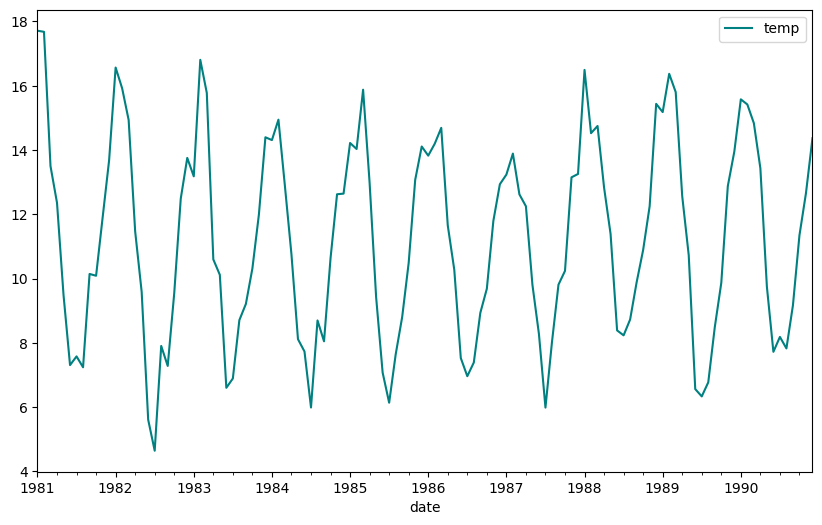

In [4]:
data.plot(y='temp', color='teal', figsize=(10,6))

In [5]:
data = pd.get_dummies(data, columns=['month'])
data['Trend'] = np.arange(1, len(data)+1)
data

,temp,month_1.0,month_2.0,month_3.0,month_4.0,month_5.0,month_6.0,month_7.0,month_8.0,month_9.0,month_10.0,month_11.0,month_12.0,Trend
date,,,,,,,,,,,,,,
1981-01-01,17.712903,True,False,False,False,False,False,False,False,False,False,False,False,1
1981-02-01,17.678571,False,True,False,False,False,False,False,False,False,False,False,False,2
1981-03-01,13.500000,False,False,True,False,False,False,False,False,False,False,False,False,3
1981-04-01,12.356667,False,False,False,True,False,False,False,False,False,False,False,False,4
1981-05-01,9.490323,False,False,False,False,True,False,False,False,False,False,False,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-08-01,7.825806,False,False,False,False,False,False,False,True,False,False,False,False,116
1990-09-01,9.166667,False,False,False,False,False,False,False,False,True,False,False,False,117
1990-10-01,11.345161,False,False,False,False,False,False,False,False,False,True,False,False,118


In [6]:
train_data = data.iloc[:84]
test_data = data.iloc[84:]

In [7]:
X = train_data.iloc[:,1:]
X.columns

Index(['month_1.0', 'month_2.0', 'month_3.0', 'month_4.0', 'month_5.0',
       'month_6.0', 'month_7.0', 'month_8.0', 'month_9.0', 'month_10.0',
       'month_11.0', 'month_12.0', 'Trend'],
      dtype='object')

In [21]:
train_data

,temp,month_1.0,month_2.0,month_3.0,month_4.0,month_5.0,month_6.0,month_7.0,month_8.0,month_9.0,month_10.0,month_11.0,month_12.0,Trend
date,,,,,,,,,,,,,,
1981-01-01,17.712903,True,False,False,False,False,False,False,False,False,False,False,False,1
1981-02-01,17.678571,False,True,False,False,False,False,False,False,False,False,False,False,2
1981-03-01,13.500000,False,False,True,False,False,False,False,False,False,False,False,False,3
1981-04-01,12.356667,False,False,False,True,False,False,False,False,False,False,False,False,4
1981-05-01,9.490323,False,False,False,False,True,False,False,False,False,False,False,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987-08-01,8.022581,False,False,False,False,False,False,False,True,False,False,False,False,80
1987-09-01,9.810000,False,False,False,False,False,False,False,False,True,False,False,False,81
1987-10-01,10.238710,False,False,False,False,False,False,False,False,False,True,False,False,82


In [20]:
X_train = train_data[['Trend'] + [col for col in data.columns if 'month' in col]]
y_train = train_data['temp']
model_sm = sm.OLS(y_train, X_train.astype(float)).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     62.33
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           9.00e-33
Time:                        12:54:29   Log-Likelihood:                -112.00
No. Observations:                  84   AIC:                             250.0
Df Residuals:                      71   BIC:                             281.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Trend         -0.0062      0.005     -1.355      0.1

In [9]:
X_test = test_data[['Trend'] + [col for col in data.columns if 'month' in col]]
test_data['Predictions'] = model_sm.predict(X_test)

C:\Users\fikri\AppData\Local\Temp\ipykernel_19392\3561233045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = model_sm.predict(X_test)


In [10]:
test_data[['temp', 'Predictions']]

,temp,Predictions
date,,
1988-01-01,16.493548,14.426434
1988-02-01,14.524138,15.057608
1988-03-01,14.748387,14.028738
1988-04-01,12.833333,11.42668
1988-05-01,11.387097,9.248093
1988-06-01,8.386667,6.864299
1988-07-01,8.232258,6.015835
1988-08-01,8.725806,7.64625
1988-09-01,9.883333,8.594299


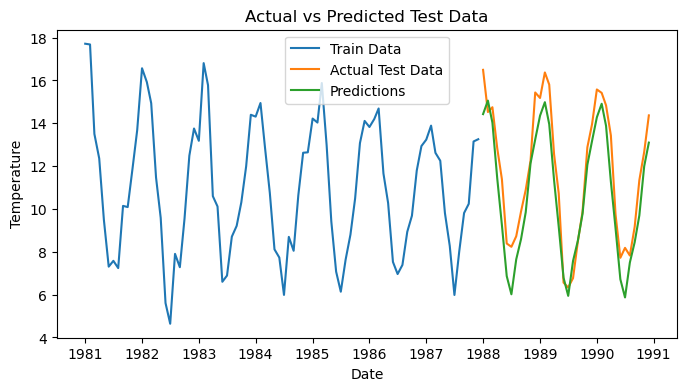

In [11]:
# Pastikan DataFrame diurutkan berdasarkan indeks datetime
test_data.sort_index(inplace=True)

# Mengonversi indeks datetime menjadi array
date_train = train_data.index.values
date_test = test_data.index.values

# Mengonversi y_train menjadi array
y_train = train_data['temp'].values

# Mengonversi 'temp' dan 'Predictions' menjadi array
temp_actual = test_data['temp'].values
predictions = test_data['Predictions'].values

# Menampilkan plot hasil prediksi
plt.figure(figsize=(8,4))
plt.plot(date_train, y_train, label='Train Data')
plt.plot(date_test, temp_actual, label='Actual Test Data')
plt.plot(date_test, predictions, label='Predictions')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Test Data')
plt.show()


In [12]:
# Menghitung metrik evaluasi untuk data uji
mse_test = mean_squared_error(test_data['temp'], test_data['Predictions'])
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(test_data['temp'], test_data['Predictions'])
mape_test = np.mean(np.abs((test_data['temp'] - test_data['Predictions']) / test_data['temp'])) * 100

print("\nMetrik evaluasi untuk data uji:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"MAPE: {mape_test}")


Metrik evaluasi untuk data uji:
MSE: 1.647684951646644
RMSE: 1.2836218102099404
MAE: 1.1060824684022312
MAPE: 9.815017199207126


- MSE (Mean Squared Error): 1.647684951646644
  <blockquote> MSE mengukur rata-rata dari kuadrat selisih antara prediksi dan nilai sebenarnya. Nilai MSE yang lebih tinggi menunjukkan bahwa model memiliki kesalahan yang lebih besar. Dalam konteks ini, nilai MSE yang relatif tinggi mungkin mengindikasikan adanya variasi yang cukup besar antara prediksi dan nilai sebenarnya. </blockquote>
  
- RMSE (Root Mean Squared Error): 1.2836218102099404
  <blockquote>RMSE adalah akar kuadrat dari MSE, dan memberikan gambaran tentang seberapa jauh kesalahan prediksi dari nilai sebenarnya dalam satuan yang sama dengan variabel target. Nilai RMSE yang lebih rendah menunjukkan kinerja model yang lebih baik. Dalam hal ini, meskipun nilai RMSE tidak sangat tinggi, masih perlu diperhatikan untuk mencari cara meningkatkan performa model. </blockquote>
  
- MAE (Mean Absolute Error): 1.1060824684022312
  <blockquote>MAE adalah rata-rata dari selisih absolut antara prediksi dan nilai sebenarnya. Semakin rendah nilai MAE, semakin baik model dalam melakukan prediksi. Dalam kasus ini, nilai MAE yang cukup rendah menunjukkan bahwa model mampu melakukan prediksi dengan tingkat kesalahan yang terbilang kecil. </blockquote>
  
- MAPE (Mean Absolute Percentage Error): 9.815017199207126
  <blockquote>MAPE mengukur rata-rata persentase dari selisih absolut antara prediksi dan nilai sebenarnya. Nilai MAPE yang relatif rendah menunjukkan bahwa persentase kesalahan prediksi model terhadap nilai sebenarnya tidak terlalu tinggi. Namun, perlu diingat bahwa interpretasi MAPE bisa bervariasi tergantung pada konteks dan karakteristik data. </blockquote>

  Dalam keseluruhan, hasil evaluasi ini menunjukkan bahwa model memiliki tingkat kesalahan yang terbilang wajar. Untuk meningkatkan performa model, dapat dilakukan penyesuaian parameter atau penerapan teknik-teknik lainnya, tergantung pada jenis model yang digunakan.

Text(0, 0.5, 'Residuals')

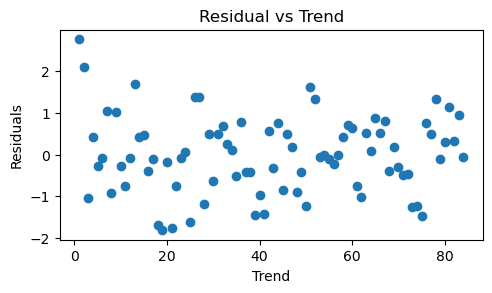

In [18]:
# 1. Linearitas
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.scatter(X_train['Trend'], model_sm.resid)
plt.title('Residual vs Trend')
plt.xlabel('Trend')
plt.ylabel('Residuals')

In [15]:
# 2. Independensi (Durbin-Watson Test)
from statsmodels.stats.stattools import durbin_watson
dw_test_statistic = durbin_watson(model_sm.resid)
print(f'Durbin-Watson Statistic: {dw_test_statistic}')

Durbin-Watson Statistic: 1.559591154132718


Text(0, 0.5, 'Residuals')

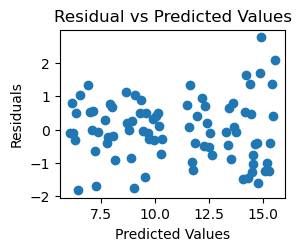

In [16]:
# 3. Homoskedastisitas
plt.subplot(2, 2, 2)
plt.scatter(model_sm.predict(X_train), model_sm.resid)
plt.title('Residual vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')


Text(0, 0.5, 'Frequency')

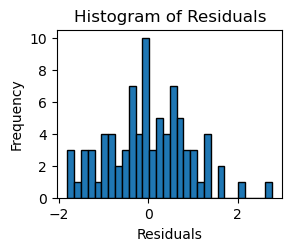

In [17]:
# 4. Normalitas Residual
plt.subplot(2, 2, 3)
plt.hist(model_sm.resid, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')